In [24]:
%matplotlib inline
from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sb

In [25]:
plt.rcParams['figure.figsize'] = 8, 4

In [26]:
df = pd.read_json(open('nobel_winners_cleaned.json'))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
award_age         858 non-null int64
category          858 non-null object
country           858 non-null object
date_of_birth     858 non-null object
date_of_death     559 non-null object
gender            858 non-null object
link              858 non-null object
name              858 non-null object
place_of_birth    831 non-null object
place_of_death    524 non-null object
text              858 non-null object
year              858 non-null int64
dtypes: int64(2), object(10)
memory usage: 80.5+ KB


In [28]:
df.date_of_birth = pd.to_datetime(df.date_of_birth)
df.date_of_death = pd.to_datetime(df.date_of_death)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
award_age         858 non-null int64
category          858 non-null object
country           858 non-null object
date_of_birth     858 non-null datetime64[ns]
date_of_death     559 non-null datetime64[ns]
gender            858 non-null object
link              858 non-null object
name              858 non-null object
place_of_birth    831 non-null object
place_of_death    524 non-null object
text              858 non-null object
year              858 non-null int64
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 80.5+ KB


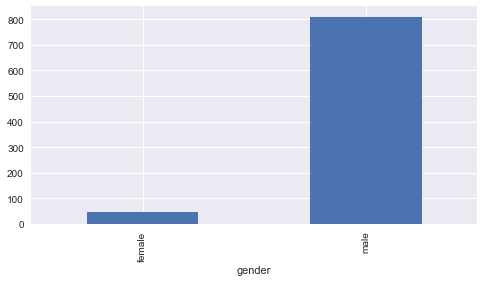

In [29]:
by_gender = df.groupby('gender')
by_gender.size().plot(kind='bar')

## Gender disparities

In [30]:
by_cat_gen = df.groupby(['category', 'gender'])
by_cat_gen.get_group(('Physics', 'female'))[['name', 'year']]

,name,year
267,Maria Goeppert-Mayer,1963
614,Marie Skłodowska-Curie,1903


In [31]:
by_cat_gen.size()

category                gender
Chemistry               female      4
                        male      167
Economics               female      1
                        male       74
Literature              female     13
                        male       93
Peace                   female     16
                        male       87
Physics                 female      2
                        male      199
Physiology or Medicine  female     11
                        male      191
dtype: int64

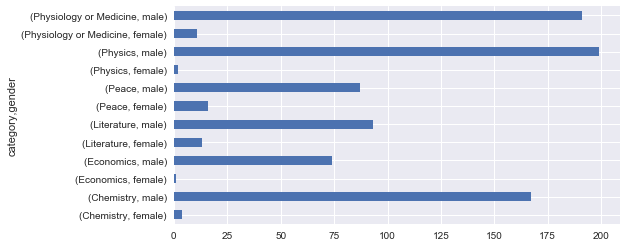

In [32]:
by_cat_gen.size().plot(kind='barh')

### Unstacking groups

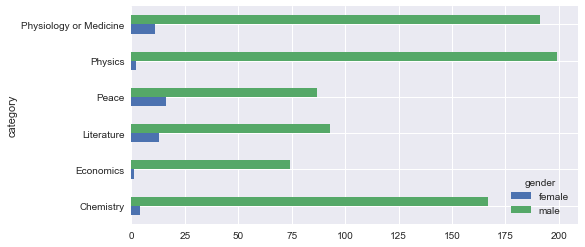

In [33]:
by_cat_gen.size().unstack().plot(kind='barh')

In [34]:
by_cat_gen.size().unstack()

gender,female,male
category,,
Chemistry,4,167
Economics,1,74
Literature,13,93
Peace,16,87
Physics,2,199
Physiology or Medicine,11,191


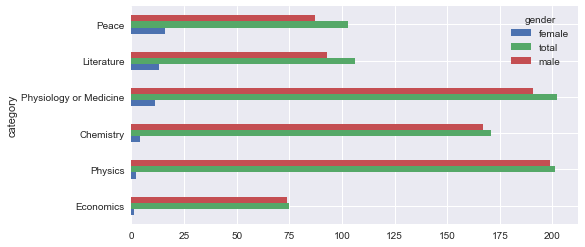

In [35]:
cat_gen_sz = by_cat_gen.size().unstack()
cat_gen_sz['total'] = cat_gen_sz.sum(axis=1)
cat_gen_sz = cat_gen_sz.sort_values(by='female', ascending=True)
cat_gen_sz[['female', 'total', 'male']].plot(kind='barh')

In [36]:
display(cat_gen_sz)

gender,female,male,total
category,,,
Economics,1,74,75
Physics,2,199,201
Chemistry,4,167,171
Physiology or Medicine,11,191,202
Literature,13,93,106
Peace,16,87,103


In [38]:
df[(df.category == 'Physics') & (df.gender == 'female')][['name', 'country', 'year']]

,name,country,year
267,Maria Goeppert-Mayer,United States,1963
614,Marie Skłodowska-Curie,Poland,1903


### Historical trends

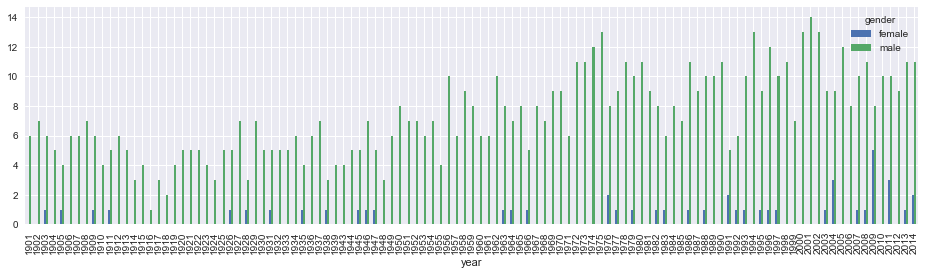

In [39]:
by_year_gender = df.groupby(['year', 'gender'])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar', figsize=(16, 4))

In [40]:
def thin_xticks(ax, tick_gap=10, rotation=45):
    """ Thin x-ticks and adjust rotation """
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticks(ticks[::tick_gap])
    ax.xaxis.set_ticklabels(ticklabels[::tick_gap], rotation=rotation)
    
    ax.figure.show()

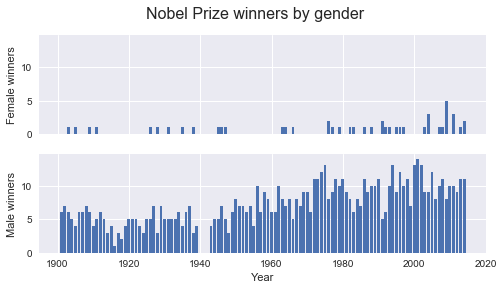

In [42]:
new_index = pd.Index(np.arange(1901, 2015), name='year')
year_gen_sz = by_year_gender.size().unstack().reindex(new_index)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

ax_f = axes[0]
ax_m = axes[1]

fig.suptitle('Nobel Prize winners by gender', fontsize=16)

ax_f.bar(year_gen_sz.index, year_gen_sz.female)
ax_f.set_ylabel('Female winners')

ax_m.bar(year_gen_sz.index, year_gen_sz.male)
ax_m.set_ylabel('Male winners')

ax_m.set_xlabel('Year')

## National trends

C:\Users\rjc\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


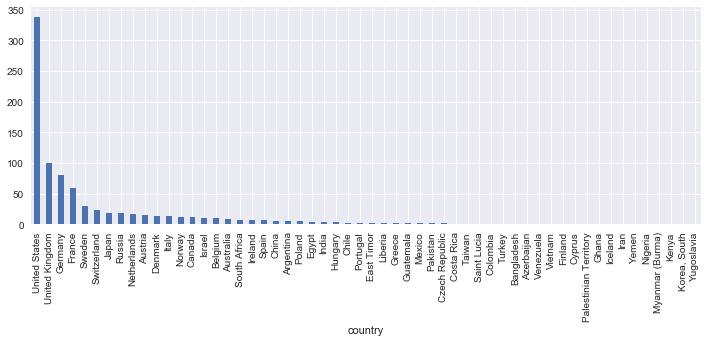

In [43]:
df.groupby('country').size().order(ascending=False).plot(kind='bar', figsize=(12, 4))

### Prize winners per capita

In [44]:
nat_group = df.groupby('country')
ngsz = nat_group.size()
ngsz.index

Index([u'Argentina', u'Australia', u'Austria', u'Azerbaijan', u'Bangladesh',
       u'Belgium', u'Canada', u'Chile', u'China', u'Colombia', u'Costa Rica',
       u'Cyprus', u'Czech Republic', u'Denmark', u'East Timor', u'Egypt',
       u'Finland', u'France', u'Germany', u'Ghana', u'Greece', u'Guatemala',
       u'Hungary', u'Iceland', u'India', u'Iran', u'Ireland', u'Israel',
       u'Italy', u'Japan', u'Kenya', u'Korea, South', u'Liberia', u'Mexico',
       u'Myanmar (Burma)', u'Netherlands', u'Nigeria', u'Norway', u'Pakistan',
       u'Palestinian Territory', u'Poland', u'Portugal', u'Russia',
       u'Saint Lucia', u'South Africa', u'Spain', u'Sweden', u'Switzerland',
       u'Taiwan', u'Turkey', u'United Kingdom', u'United States', u'Venezuela',
       u'Vietnam', u'Yemen', u'Yugoslavia'],
      dtype='object', name=u'country')

In [53]:
df_countries = pd.read_json(open('winning_country_data.json')).transpose()
display(df_countries)

,alpha3Code,area,capital,gini,latlng,name,population
Argentina,ARG,2.7804e+06,Buenos Aires,44.5,"[-34.0, -64.0]",Argentina,42669500
Australia,AUS,7.69202e+06,Canberra,30.5,"[-27.0, 133.0]",Australia,23696900
Austria,AUT,83871,Vienna,26,"[47.33333333, 13.33333333]",Austria,8527230
Azerbaijan,AZE,86600,Baku,33.7,"[40.5, 47.5]",Azerbaijan,9552500
Bangladesh,BGD,147570,Dhaka,32.1,"[24.0, 90.0]",Bangladesh,157486000
Belgium,BEL,30528,Brussels,33,"[50.83333333, 4.0]",Belgium,11225469
Canada,CAN,9.98467e+06,Ottawa,32.6,"[60.0, -95.0]",Canada,35540419
Chile,CHL,756102,Santiago,52.1,"[-30.0, -71.0]",Chile,17819054
China,CHN,9.64001e+06,Beijing,47,"[35.0, 105.0]",China,1367110000
Colombia,COL,1.14175e+06,Bogotá,55.9,"[4.0, -72.0]",Colombia,47907800


In [54]:
df_countries = df_countries.set_index('name')
df_countries['nobel_wins'] = ngsz
df_countries['nobel_wins_per_capita'] = df_countries.nobel_wins / df_countries.population

C:\Users\rjc\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


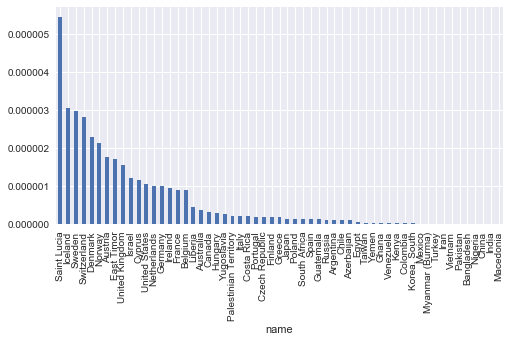

In [57]:
df_countries.sort('nobel_wins_per_capita', ascending=False).nobel_wins_per_capita.plot(kind='bar')

C:\Users\rjc\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


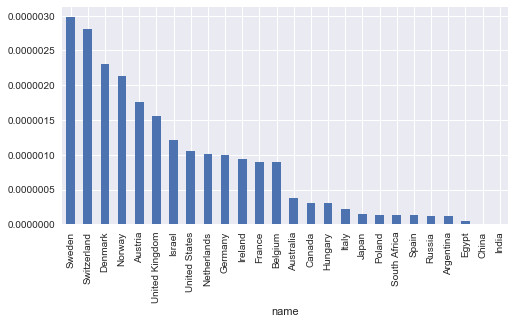

In [58]:
df_countries[df_countries.nobel_wins > 2].sort('nobel_wins_per_capita', ascending=False).nobel_wins_per_capita.plot(kind='bar')

### Prizes by category

In [59]:
nat_cat_sz = df.groupby(['country', 'category']).size().unstack()
display(nat_cat_sz)

category,Chemistry,Economics,Literature,Peace,Physics,Physiology or Medicine
country,,,,,,
Argentina,1.0,NaN,NaN,2.0,NaN,2.0
Australia,NaN,1.0,1.0,NaN,1.0,6.0
Austria,3.0,1.0,1.0,2.0,4.0,4.0
Azerbaijan,NaN,NaN,NaN,NaN,1.0,NaN
Bangladesh,NaN,NaN,NaN,1.0,NaN,NaN
Belgium,1.0,NaN,1.0,3.0,1.0,4.0
Canada,4.0,1.0,1.0,1.0,2.0,2.0
Chile,NaN,NaN,2.0,NaN,NaN,NaN
China,NaN,NaN,1.0,2.0,2.0,NaN


C:\Users\rjc\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: order is deprecated, use sort_values(...)


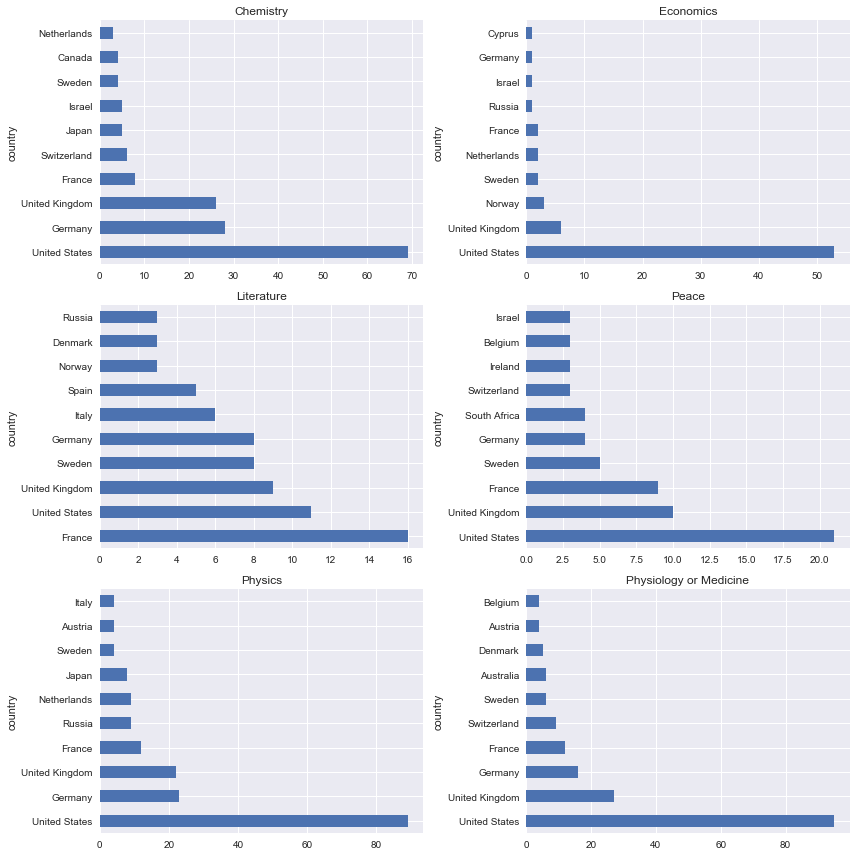

In [61]:
COL_NUM = 2
ROW_NUM = 3

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12, 12))

for i, (label, col) in enumerate(nat_cat_sz.iteritems()):
    ax = axes[i/COL_NUM, i%COL_NUM]
    col = col.order(ascending=False)[:10]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)

plt.tight_layout()

### Historical trends in prize distribution

In [62]:
plt.rcParams['font.size'] = 20

In [63]:
new_index = pd.Index(np.arange(1901, 2015), name='year')

by_year_nat_sz = df.groupby(['year', 'country']).size().unstack().reindex(new_index)
display(by_year_nat_sz)

country,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belgium,Canada,Chile,China,Colombia,...,Sweden,Switzerland,Taiwan,Turkey,United Kingdom,United States,Venezuela,Vietnam,Yemen,Yugoslavia
year,,,,,,,,,,,,,,,,,,,,,
1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1905,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
1907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
1908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1909,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


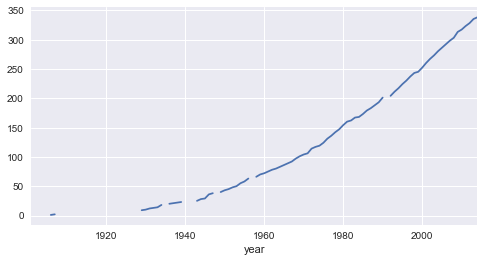

In [64]:
by_year_nat_sz['United States'].cumsum().plot()

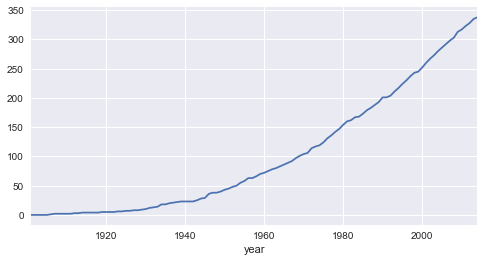

In [66]:
by_year_nat_sz['United States'].fillna(0).cumsum().plot()

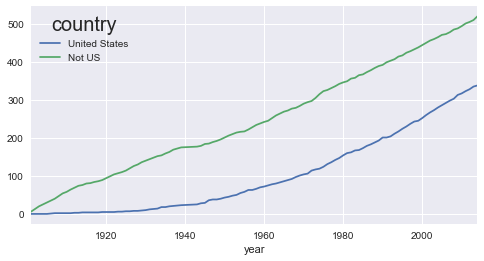

In [68]:
by_year_nat_sz = df.groupby(['year', 'country']).size().unstack().fillna(0)

not_US = by_year_nat_sz.columns.tolist()
not_US.remove('United States')

by_year_nat_sz['Not US'] = by_year_nat_sz[not_US].sum(axis=1)
ax = by_year_nat_sz[['United States', 'Not US']].cumsum().plot()

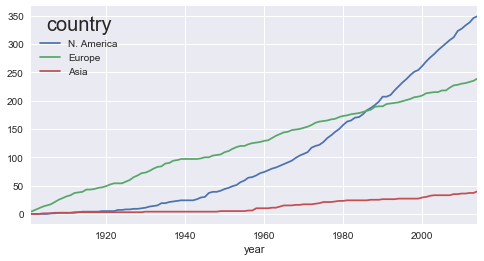

In [69]:
by_year_nat_sz = df.groupby(['year', 'country']).size().unstack().reindex(new_index).fillna(0)

regions = [{'label': 'N. America', 'countries': ['United States', 'Canada']}, \
          {'label': 'Europe', 'countries': ['United Kingdom', 'Germany', 'France']}, \
          {'label': 'Asia', 'countries': ['Japan', 'Russia', 'India']}
          ]

for region in regions:
    by_year_nat_sz[region['label']] = by_year_nat_sz[region['countries']].sum(axis=1)

by_year_nat_sz[[r['label'] for r in regions]].cumsum().plot()

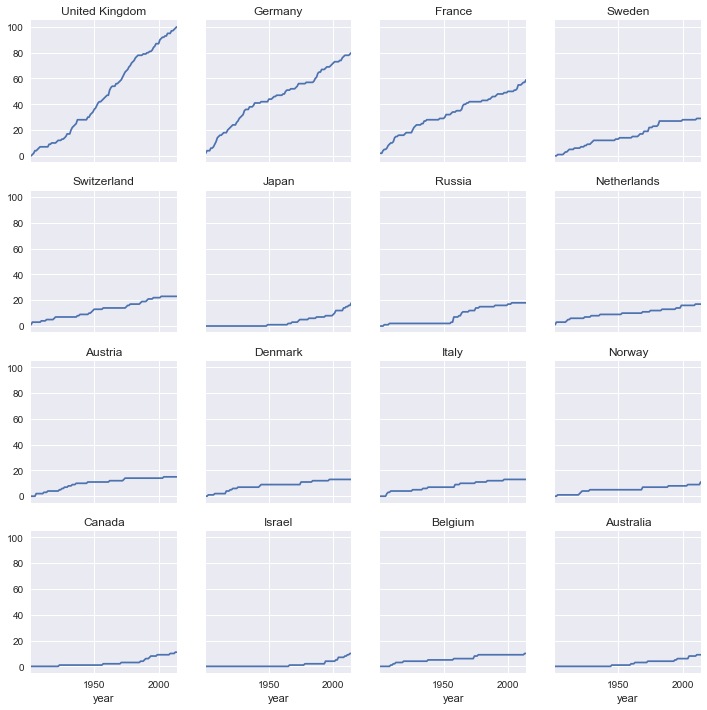

In [71]:
COL_NUM = 4
ROW_NUM = 4

by_nat_sz = df.groupby('country').size()
by_nat_sz.sort_values(ascending=False, inplace=True)

fig, axes = plt.subplots(COL_NUM, ROW_NUM, sharex=True, sharey=True, figsize=(12, 12))

for i, nat in enumerate(by_nat_sz.index[1:17]):
    ax = axes[i/COL_NUM, i%ROW_NUM]
    by_year_nat_sz[nat].cumsum().plot(ax=ax)
    ax.set_title(nat)

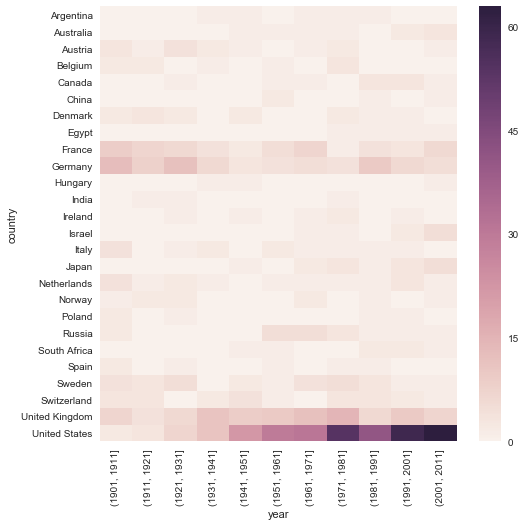

In [75]:
bins = np.arange(df.year.min(), df.year.max(), 10)

by_year_nat_binned = df.groupby([pd.cut(df.year, bins, precision=0), 'country']).size().unstack().fillna(0).transpose()

plt.figure(figsize=(8, 8))

sb.heatmap(by_year_nat_binned[by_year_nat_binned.sum(axis=1) > 2])

## Age and life expectancy of winners

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
award_age         858 non-null int64
category          858 non-null object
country           858 non-null object
date_of_birth     858 non-null datetime64[ns]
date_of_death     559 non-null datetime64[ns]
gender            858 non-null object
link              858 non-null object
name              858 non-null object
place_of_birth    831 non-null object
place_of_death    524 non-null object
text              858 non-null object
year              858 non-null int64
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 80.5+ KB


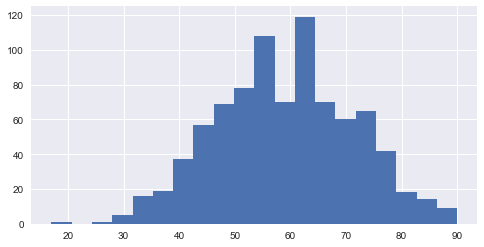

In [77]:
df['award_age'].hist(bins=20)

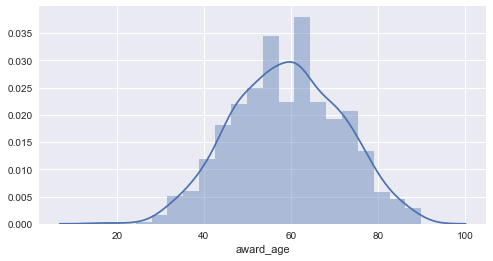

In [78]:
sb.distplot(df['award_age'])

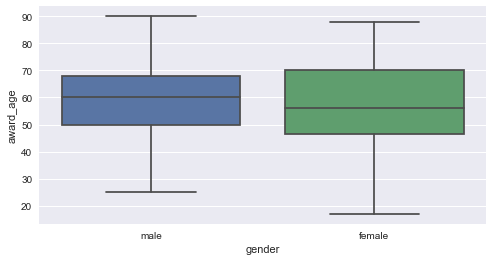

In [79]:
sb.boxplot(df.gender, df.award_age)

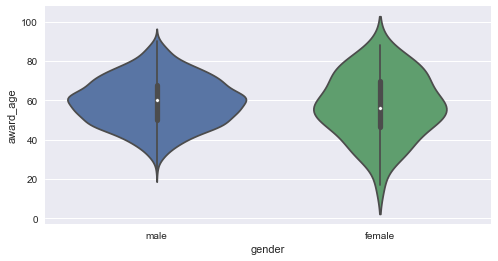

In [80]:
sb.violinplot(df.gender, df.award_age)

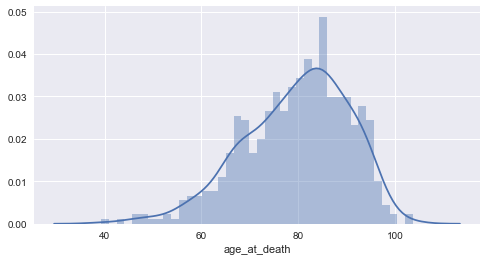

In [82]:
df['age_at_death'] = (df.date_of_death - df.date_of_birth).dt.days/365
age_at_death = df[df.age_at_death.notnull()].age_at_death

sb.distplot(age_at_death, bins=40)

In [83]:
df[df.age_at_death > 100][['name', 'category', 'year']]

,name,category,year
101,Ronald Coase,Economics,1991
329,Rita Levi-Montalcini,Physiology or Medicine,1986


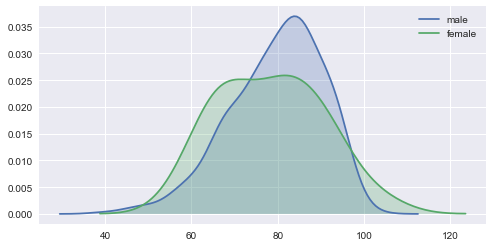

In [85]:
df2 = df[df.age_at_death.notnull()]
sb.kdeplot(df2[df2.gender == 'male'].age_at_death, shade=True, label='male')
sb.kdeplot(df2[df2.gender == 'female'].age_at_death, shade=True, label='female')

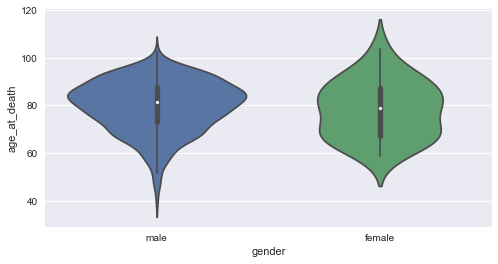

In [86]:
sb.violinplot(df.gender, age_at_death)

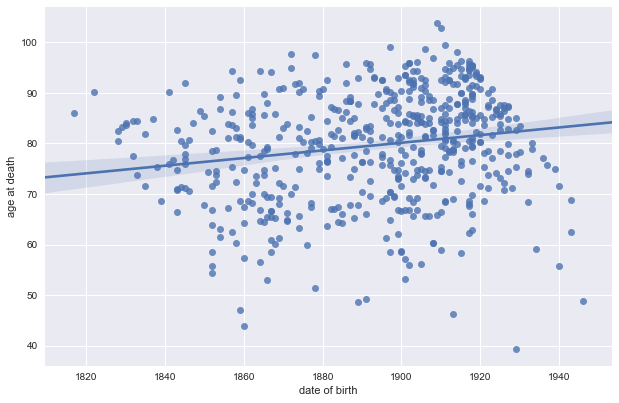

In [87]:
df_temp=df[df.age_at_death.notnull()]
data = pd.DataFrame({'age at death': df_temp.age_at_death, 'date of birth': df_temp.date_of_birth.dt.year})

sb.lmplot('date of birth', 'age at death', data, size=6, aspect=1.5)

## The Nobel diaspora

In [89]:
df = pd.read_json(open('nobel_winners_plus_bornin.json'))

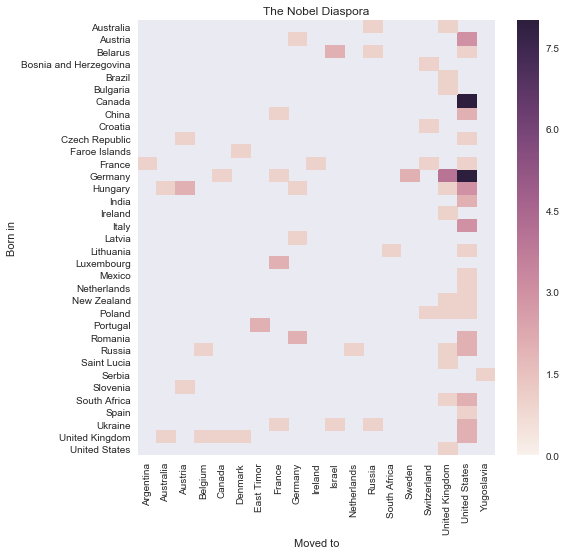

In [91]:
by_bornin_nat = df[df.born_in.notnull()].groupby(['born_in', 'country']).size().unstack()
by_bornin_nat.index.name = 'Born in'
by_bornin_nat.columns.name = 'Moved to'
plt.figure(figsize=(8, 8))

ax = sb.heatmap(by_bornin_nat, vmin=0, vmax=8)
ax.set_title('The Nobel Diaspora')

In [93]:
df[(df.born_in == 'Germany') & (df.country == 'United Kingdom')][['name', 'date_of_birth', 'category']]

,name,date_of_birth,category
119,Ernst Boris Chain,1906-06-19T00:00:00.000Z,Physiology or Medicine
484,Hans Adolf Krebs,1900-08-25T00:00:00.000Z,Physiology or Medicine
486,Max Born,1882-12-11T00:00:00.000Z,Physics
503,Bernard Katz,1911-03-26T00:00:00.000Z,Physiology or Medicine
